In [112]:
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt

In [113]:
def set_float_point():
    return pd.set_option('display.float_format', '{:.2f}'.format)

set_float_point()

### non data: Cuba & Afranghan

In [114]:

csv_file = 'ass1_dataset.csv'
json_file = 'ass1_dataset.json'

df = pd.read_csv(csv_file,encoding='ISO-8859-1')
gdp_by_country_name = 'gdp_2023.xls'
gdp_by_country = pd.read_excel(gdp_by_country_name)
gdp_by_country

,Country,2023
0,Albania,19028.68
1,Algeria,13507.18
2,Andorra,68997.89
3,Angola,7221.61
4,Antigua and Barbuda,24011.80
...,...,...
218,Latin America and the Caribbean,19390.29
219,Major advanced economies (G7),67165.51
220,Middle East and Central Asia,15542.24
221,Other advanced economies,66407.61


In [115]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

## Column Filtering: Processing Columns 1. Earning 2. Sub 3. Viewer 4. categ
<li>subscribers :p1 p2
<li>video views :p1 p2
<li>subscribers_for_last_30_days :p1 p2(prbably not)
<li>video_views_for_the_last_30_days:p1 p2(prbably not)
<li>category: p2
<li>Country:p1 p2
<li>lowest_monthly_earnings: p2
<li>highest_monthly_earnings: p2




In [116]:
selected_col = ['rank','subscribers',
'video views',
'subscribers_for_last_30_days',
'video_views_for_the_last_30_days',
'category',
'Country',
'lowest_monthly_earnings',
'highest_monthly_earnings']


## too many na value in subscribers_for_last_30_days column -> recommend using subscriber & video views

In [117]:
for col in selected_col:
    print(col)
    print(len(df[df[col].isna()]))

rank
0
subscribers
0
video views
0
subscribers_for_last_30_days
337
video_views_for_the_last_30_days
56
category
46
Country
122
lowest_monthly_earnings
0
highest_monthly_earnings
0


### Why subscribers_for_last_30_days is full of notna value --> created_year is incorrect for those channels whose subscribers_for_last_30_days is na

In [118]:
df[df['subscribers_for_last_30_days'].isna()].groupby(by='created_year').count()
df[(df['subscribers_for_last_30_days'].notna())&(df['created_year']==2021)]
df[(df['subscribers_for_last_30_days'].isna())&(df['created_year']==2021)]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
77,78,LUCCAS NETO - LUCCAS TOON,39400000,22302547082.00,People & Blogs,LUCCAS NETO- LUCCAS TOON,1,NaN,NaN,Games,...,NaN,2021.00,Mar,25.00,NaN,NaN,NaN,NaN,NaN,NaN
445,446,Busy Fun Ltd,18800000,7762077012.00,NaN,TG MAYANK YT,2,NaN,NaN,NaN,...,NaN,2021.00,Dec,21.00,NaN,NaN,NaN,NaN,NaN,NaN
668,669,Hongyu ASMR ï¿½ï¿½,15100000,4967784343.00,People & Blogs,Hongyu ASMR ï¿½ï¿½ï,1,NaN,NaN,People,...,NaN,2021.00,Mar,16.00,NaN,NaN,NaN,NaN,NaN,NaN
808,809,Jamuna TV,13900000,12129583055.00,News & Politics,jamuna tv24,6,Bangladesh,BD,Entertainment,...,NaN,2021.00,Feb,10.00,20.60,167310838.00,4.19,60987417.00,23.68,90.36
904,905,Jomy Production,13000000,5057163256.00,Entertainment,SRK Edie soon,8,India,IN,NaN,...,NaN,2021.00,Mar,18.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96


### count na distribution

(array([17., 16., 11., 16., 12.,  7.,  9.,  8.]),
 array([100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <BarContainer object of 8 artists>)

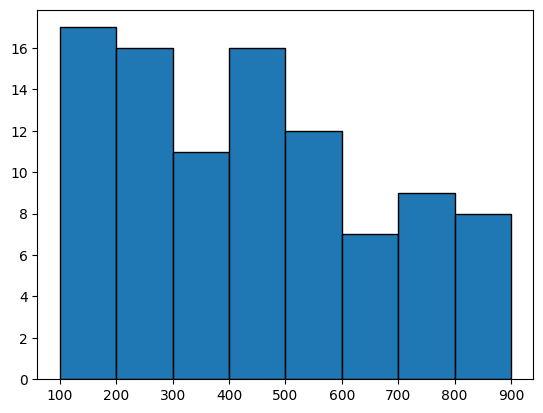

In [119]:
bin_edges = [100,200,300,400,500,600,700,800,900]
x = non_official.loc[df['Country'].isna(),'rank']
plt.hist(x, bins=bin_edges, edgecolor='black')

## cleaning

In [120]:
#out official channel whose video view is 0
def cutoff_video_channel(df):
    return df.loc[df['video views']!=0,:]

non_official = cutoff_video_channel(df)

In [121]:
def cleaning_countryna(df):
    return df.loc[df['Country'].notna(),:]
non_countryna = cleaning_countryna(non_official)

In [122]:
def select_col(df,cols):
    return df[cols]
selected_col = select_col(non_countryna,selected_col)

## GDP datamapping

In [123]:
merged = selected_col.merge(gdp_by_country,on='Country')

In [128]:
merged.to_csv('cleaned_youtuber_ranking.csv')

## End of data cleanning

In [125]:
us_df = df.loc[df['Country']=='United States',:]

In [126]:
nan_df = df.loc[df['Country'].isna(),:]
nan_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0.00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.00,Sep,24.00,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.00,Dec,15.00,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,24118230580.00,Film & Animation,goldmines,1,NaN,NaN,Music,...,NaN,2006.00,Aug,15.00,NaN,NaN,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,32312431239.00,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,...,NaN,2016.00,Nov,29.00,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,19398045702.00,Entertainment,badabun,1,NaN,NaN,Music,...,75.00,2007.00,Jul,21.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,Troom Troom PT,12500000,4384177908.00,Howto & Style,Troom Troom PT,2738,NaN,NaN,Howto,...,NaN,2015.00,Apr,19.00,NaN,NaN,NaN,NaN,NaN,NaN
967,968,Troom Troom Indonesia,12500000,5379684248.00,People & Blogs,TROOM TROOM INDONESIA,8,NaN,NaN,People,...,NaN,2020.00,Jul,29.00,NaN,NaN,NaN,NaN,NaN,NaN
972,973,Hero Movies 2023,12400000,1689090619.00,People & Blogs,Hero Movies 2023,689,NaN,NaN,People,...,NaN,2017.00,Feb,22.00,NaN,NaN,NaN,NaN,NaN,NaN
985,986,TKOR,12400000,3392022527.00,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.00,Aug,16.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
df[['video views','category']].groupby('category').sum().sort_values(by='video views',ascending=False)

,video views
category,
Music,3121477506633
Entertainment,2527739309583
People & Blogs,1265791201548
Gaming,717638899629
Education,696614472899
Comedy,550112774315
Film & Animation,544422509313
Shows,446206826909
News & Politics,270391919347


In [ ]:
view_byvid = df.groupby(['Country','category'])[['video views']].sum()

In [ ]:
df.loc[(df['Country']=='India'),:].groupby('category')['video views'].sum()

category
Comedy                  99718638450
Education              179179308515
Entertainment          551343827960
Film & Animation       110125421502
Gaming                   3864199945
Howto & Style           18397094400
Movies                  15383255129
Music                  673625200058
News & Politics        110082745690
People & Blogs         122744120145
Science & Technology    12490209066
Shows                  345677199342
Trailers                33262717607
Name: video views, dtype: float64

In [ ]:
def sort_byview(group):
    return group.sort_values(ascending=False)

In [111]:
view_byvid.apply(sort_byview).to_excel('goeda_row.xlsx')


NameError: name 'view_byvid' is not defined

In [25]:
import matplotlib
view_byvid.iloc[2,2:5]

Series([], Name: (Argentina, Comedy), dtype: float64)